# Presentation link 

In [390]:
# https://prezi.com/view/mo9GRlXAA1C9iMp6PYIi/

In [297]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
%matplotlib inline

In [298]:
df_origin = pd.read_csv("train.csv")

In [299]:
df_origin.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [300]:
df_origin.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [301]:
df = df_origin.copy()

In [302]:
df.tail(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Missing values

In [303]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot: xlabel='Age', ylabel='Count'>

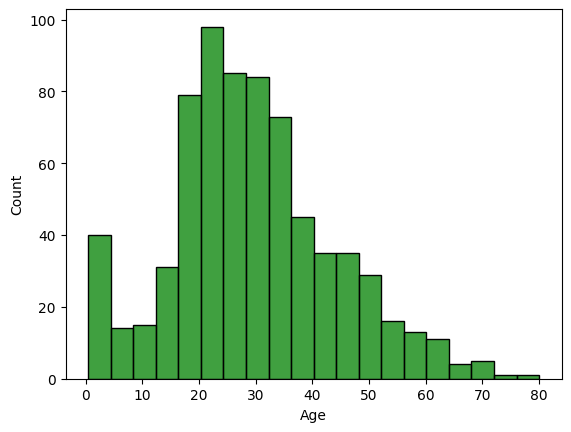

In [304]:
sns.histplot(df['Age'],color='green')

In [305]:
age_mean = df['Age'].mean(skipna=True)
print(age_mean)

29.69911764705882


In [306]:
age_median = df['Age'].median()
age_median

28.0

In [307]:
import statistics as st
 
age_mode = st.mode(df['Age'])
age_mode

24.0

In [308]:
# mean, median, mode
df['age_mean'] = df['Age'].fillna(age_mean)
df['age_median'] = df['Age'].fillna(age_median)
df['age_mode'] = df['Age'].fillna(age_mode)

<AxesSubplot: xlabel='Age', ylabel='Count'>

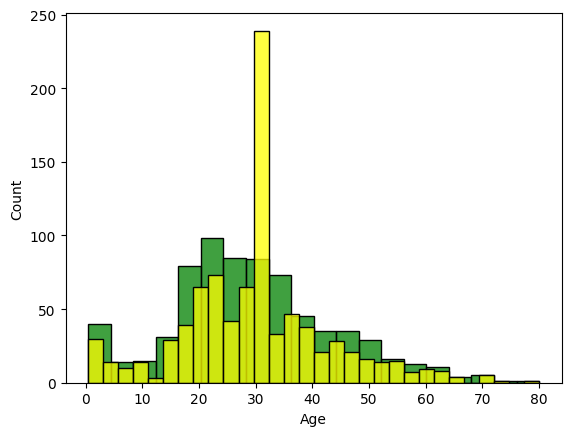

In [309]:
sns.histplot(df['Age'],color='green')
sns.histplot(df['age_mean'],color='yellow')

<AxesSubplot: xlabel='Age', ylabel='Count'>

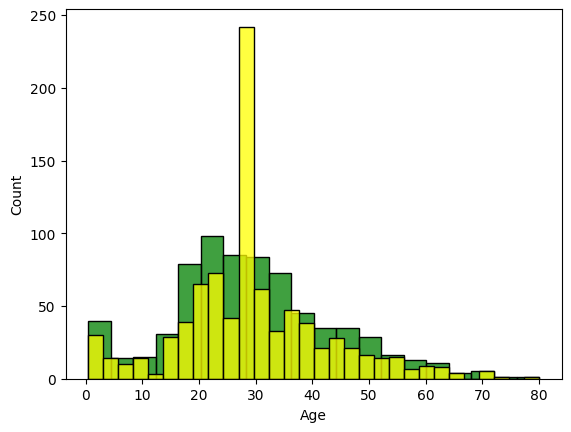

In [310]:
sns.histplot(df['Age'],color='green')
sns.histplot(df['age_median'],color='yellow')

<AxesSubplot: xlabel='Age', ylabel='Count'>

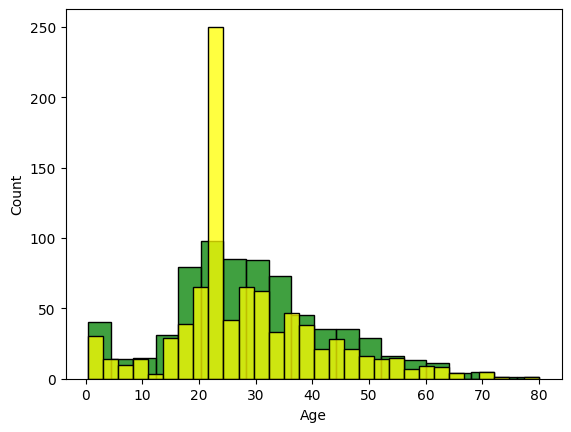

In [311]:
sns.histplot(df['Age'],color='green')
sns.histplot(df['age_mode'],color='yellow')

In [312]:
to_drop = ['Age', 'age_mode', 'age_median']
df = df.drop(columns = to_drop)

In [313]:
# df['Cabin'].values

In [314]:
df['cabin_letter'] = df['Cabin'].fillna(0)

In [315]:
cabin_values = list()
size_df = range(len(df))

for i in size_df:
    cabin =  df['Cabin'][i]
    if cabin is not np.nan:
        letter = cabin[0]
        df['cabin_letter'][i] = str(letter)
        if letter not in cabin_values:
            cabin_values.append(letter)

cabin_values

/var/folders/zy/0n165qy96vxgpv3m2z9_5tf00000gn/T/ipykernel_6211/1431756043.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cabin_letter'][i] = str(letter)


['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T']

In [316]:
df['cabin_a'] = df['cabin_letter'].replace(
    ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], [1,0,0,0,0,0,0,0])

In [317]:
df['cabin_b'] = df['cabin_letter'].replace(
    ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], [0,1,0,0,0,0,0,0])

In [318]:
df['cabin_c'] = df['cabin_letter'].replace(
    ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], [0,0,1,0,0,0,0,0])

In [319]:
df['cabin_d'] = df['cabin_letter'].replace(
    ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], [0,0,0,1,0,0,0,0])

In [320]:
df['cabin_e'] = df['cabin_letter'].replace(
    ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], [0,0,0,0,1,0,0,0])

In [321]:
df['cabin_f'] = df['cabin_letter'].replace(
    ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], [0,0,0,0,0,1,0,0])

In [322]:
df['cabin_g'] = df['cabin_letter'].replace(
    ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], [0,0,0,0,0,0,1,0])

In [323]:
df['cabin_t'] = df['cabin_letter'].replace(
    ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], [0,0,0,0,0,0,0,1])

In [324]:
to_drop = ['Cabin', 'cabin_letter']
df = df.drop(columns = to_drop)

In [325]:
df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,age_mean,cabin_a,cabin_b,cabin_c,cabin_d,cabin_e,cabin_f,cabin_g,cabin_t
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,22.000000,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,38.000000,0,0,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,26.000000,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,35.000000,0,0,1,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,35.000000,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S,27.000000,0,0,0,0,0,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S,19.000000,0,1,0,0,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S,29.699118,0,0,0,0,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C,26.000000,0,0,1,0,0,0,0,0


<AxesSubplot: xlabel='Embarked', ylabel='Count'>

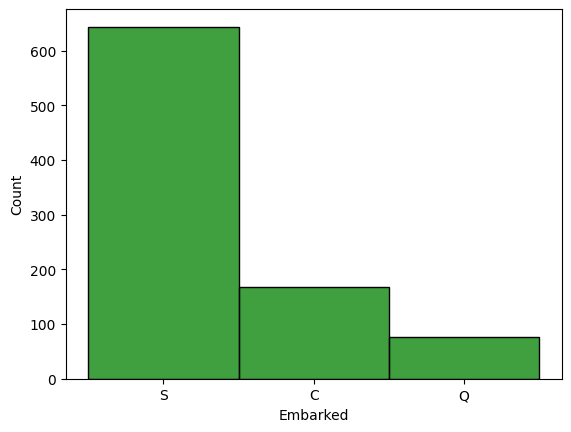

In [326]:
# Embarked
sns.histplot(df['Embarked'],color='green')

In [327]:
embarked_mode = df['Embarked'].mode()[0]
embarked_mode

'S'

In [328]:
df['embarked_mode'] = df['Embarked'].fillna(embarked_mode)

In [329]:
to_drop = ['Embarked']
df = df.drop(columns = to_drop)

In [330]:
# # Todo: Ticket
# sns.scatterplot(y='Fare', x='embarked_mode', data=df,)
# plt.show()

In [331]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
age_mean         0
cabin_a          0
cabin_b          0
cabin_c          0
cabin_d          0
cabin_e          0
cabin_f          0
cabin_g          0
cabin_t          0
embarked_mode    0
dtype: int64

In [332]:
# df.shape

# improve Pclass, Sex, Embarked

In [333]:
df['Pclass_1'] = df['Pclass'].replace([3,2], [0,0])
df['Pclass_2'] = df['Pclass'].replace([3,2,1], [0,1,0])
df['Pclass_3'] = df['Pclass'].replace([3,2,1], [1,0,0])

In [334]:
df['female'] = df['Sex'].replace({'female':1, 'male':0})

In [335]:
df['male'] = df['Sex'].replace({'female':0, 'male':1})

In [336]:
df['embarked_s'] = df['embarked_mode'].replace({'S':1,'C':0,'Q':0})

In [337]:
df['embarked_c'] = df['embarked_mode'].replace({'S':0,'C':1,'Q':0})

In [338]:
df['embarked_q'] = df['embarked_mode'].replace({'S':0,'C':0,'Q':1})

In [339]:
to_drop = ['Pclass', 'Sex', 'embarked_mode']
df = df.drop(columns = to_drop)

In [340]:
to_drop = ['PassengerId', 'Name', 'Ticket']
df = df.drop(columns = to_drop)

In [341]:
df.head()

,Survived,SibSp,Parch,Fare,age_mean,cabin_a,cabin_b,cabin_c,cabin_d,cabin_e,...,cabin_g,cabin_t,Pclass_1,Pclass_2,Pclass_3,female,male,embarked_s,embarked_c,embarked_q
0,0,1,0,7.2500,22.0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
1,1,1,0,71.2833,38.0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
2,1,0,0,7.9250,26.0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
3,1,1,0,53.1000,35.0,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
4,0,0,0,8.0500,35.0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


# Correlation

<AxesSubplot: >

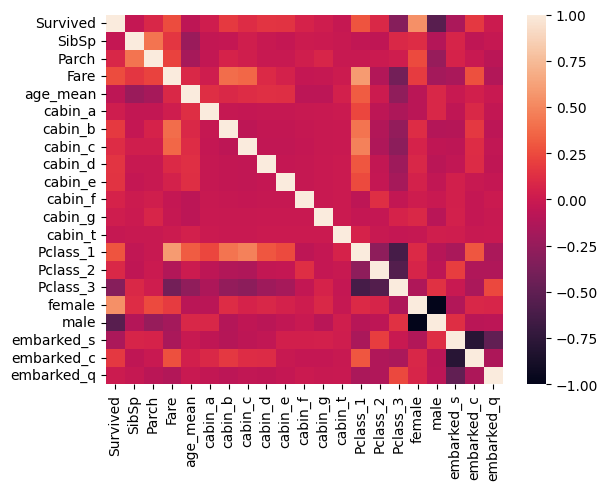

In [342]:
fig, ax = plt.subplots()
sns.heatmap(df.corr(), ax = ax)

In [343]:
corr_df = df.corr()
corr_save = corr_df["Survived"].sort_values(ascending = False)
corr_save.head()

Survived    1.000000
female      0.543351
Pclass_1    0.285904
Fare        0.257307
cabin_b     0.175095
Name: Survived, dtype: float64

In [344]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

# k-Nearest Neighbours classifier (kNN)

In [345]:
df.shape

(891, 21)

In [346]:
df.columns

Index(['Survived', 'SibSp', 'Parch', 'Fare', 'age_mean', 'cabin_a', 'cabin_b',
       'cabin_c', 'cabin_d', 'cabin_e', 'cabin_f', 'cabin_g', 'cabin_t',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'female', 'male', 'embarked_s',
       'embarked_c', 'embarked_q'],
      dtype='object')

In [347]:
# split dataa
x = df.iloc[:, 1:]
y = df.iloc[:, 0]
x.shape, y.shape

((891, 20), (891,))

# Scaling data

In [348]:
from sklearn.preprocessing import MinMaxScaler

In [349]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [350]:
x = pd.DataFrame(x_scaled, columns = x.columns)

In [351]:
x

,SibSp,Parch,Fare,age_mean,cabin_a,cabin_b,cabin_c,cabin_d,cabin_e,cabin_f,cabin_g,cabin_t,Pclass_1,Pclass_2,Pclass_3,female,male,embarked_s,embarked_c,embarked_q
0,0.125,0.000000,0.014151,0.271174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.125,0.000000,0.139136,0.472229,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.000,0.000000,0.015469,0.321438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0.125,0.000000,0.103644,0.434531,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.000,0.000000,0.015713,0.434531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.000,0.000000,0.025374,0.334004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
887,0.000,0.000000,0.058556,0.233476,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
888,0.125,0.333333,0.045771,0.367921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
889,0.000,0.000000,0.058556,0.321438,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [352]:
from sklearn.model_selection import train_test_split

In [353]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 56, stratify=y)

In [354]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 20)
(223, 20)
(668,)
(223,)


In [355]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [356]:
knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(x_train, y_train)

# Predicting
test_predict = knn.predict(x_test)

k = f1_score(test_predict, y_test)
print('N = 10, F1 Score ', k )

N = 10, F1 Score  0.7133757961783439


# Value for k

In [357]:
def get_k(K):
    error = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train, y_train)

#Appending mse value to empty list claculated using the predictions
        tmp = knn.predict(x_test)
        tmp = mean_squared_error(tmp, y_test)
        error.append(tmp)
    
    return error

In [358]:
k = range(1,40)
error = get_k(k)

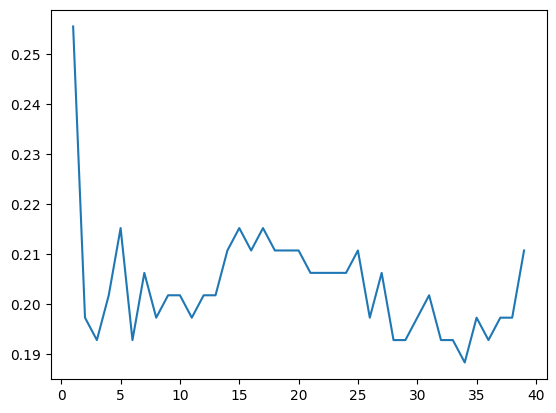

In [359]:
plt.plot(k, error)

In [360]:
knn_best = 0
n_best = 0
for  i in range(30, 40):
    knn = KNeighborsClassifier(n_neighbors = i)

    knn.fit(x_train, y_train)

    # Predicting
    test_predict = knn.predict(x_test)

    k = f1_score(test_predict, y_test)
    print(i, 'F1 Score ', k )
    if k > knn_best:
        knn_best = k
        n_best = i
        
print('The best n_neighbors = ', n_best)

30 F1 Score  0.7066666666666667
31 F1 Score  0.7019867549668873
32 F1 Score  0.7074829931972788
33 F1 Score  0.7114093959731544
34 F1 Score  0.7162162162162162
35 F1 Score  0.7066666666666667
36 F1 Score  0.7114093959731544
37 F1 Score  0.7066666666666667
38 F1 Score  0.7027027027027026
39 F1 Score  0.6928104575163397
The best n_neighbors =  34


In [361]:
knn = KNeighborsClassifier(n_neighbors = n_best)

knn.fit(x_train, y_train)

# Predicting
test_predict = knn.predict(x_test)

k = f1_score(test_predict, y_test)
print('N = {} F1 Score {}'.format(n_best, k))

N = 34 F1 Score 0.7162162162162162


# Scaling data

In [362]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [363]:
x = pd.DataFrame(x_scaled)

In [364]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.125,0.0,0.014151,0.271174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.125,0.0,0.139136,0.472229,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.000,0.0,0.015469,0.321438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0.125,0.0,0.103644,0.434531,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.000,0.0,0.015713,0.434531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [365]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 25)

In [366]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(668, 20) (668,)
(223, 20) (223,)


In [367]:
from sklearn.metrics import mean_squared_error

In [368]:
knn = KNeighborsClassifier(n_neighbors = n_best)

knn.fit(x_train, y_train)

# Predicting
test_predict = knn.predict(x_test)

mean_squared_error_knn = mean_squared_error(y_test, test_predict)
print('Test mean_squared_error', mean_squared_error_knn)

Test mean_squared_error 0.17488789237668162


In [369]:
k = range(1,40)
error = get_k(k)

Text(0.5, 1.0, 'get k Curve')

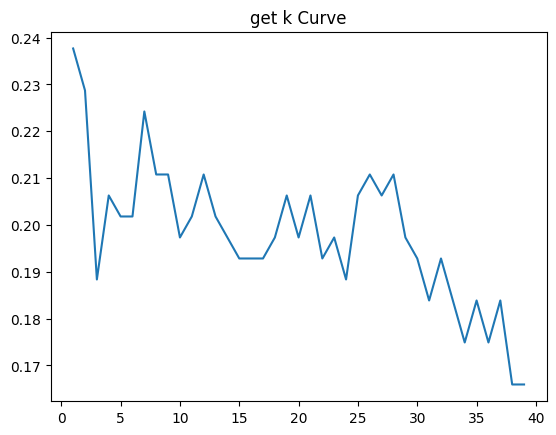

In [370]:
plt.plot(k, error)
plt.title('get k Curve')

In [371]:
knn_best = 0
n_best = 0
for  i in range(30, 40):
    knn = KNeighborsClassifier(n_neighbors = i)

    knn.fit(x_train, y_train)

    # Predicting
    test_predict = knn.predict(x_test)

    k = f1_score(test_predict, y_test)
    print(i, 'F1 Score ', k )
    if k > knn_best:
        knn_best = k
        n_best = i
        
print('The best n_neighbors = ', n_best)

30 F1 Score  0.6993006993006993
31 F1 Score  0.7172413793103449
32 F1 Score  0.6993006993006993
33 F1 Score  0.7172413793103449
34 F1 Score  0.723404255319149
35 F1 Score  0.7172413793103449
36 F1 Score  0.7194244604316546
37 F1 Score  0.7132867132867133
38 F1 Score  0.7299270072992701
39 F1 Score  0.7299270072992701
The best n_neighbors =  38


In [372]:
# plt.scatter(k, error)
# plt.title('k Curve for test')

In [373]:
df.columns

Index(['Survived', 'SibSp', 'Parch', 'Fare', 'age_mean', 'cabin_a', 'cabin_b',
       'cabin_c', 'cabin_d', 'cabin_e', 'cabin_f', 'cabin_g', 'cabin_t',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'female', 'male', 'embarked_s',
       'embarked_c', 'embarked_q'],
      dtype='object')

In [374]:
data_test = df.iloc[:, 1:].values

In [375]:
from sklearn.metrics import accuracy_score, make_scorer

In [376]:
# Creating instance of KNN
knn = KNeighborsClassifier(n_neighbors = n_best)

# Fitting the model
knn.fit(x_train, y_train)

# Predicting over the Train Set and calculating F1
predict_knn = knn.predict(x_test)

mean_squared_error_knn = mean_squared_error(y_test, predict_knn)
print('Test mean_squared_error', mean_squared_error_knn)

Test mean_squared_error 0.16591928251121077


In [377]:
# accuracy_score(y_true, y_pred.round(), normalize=False)
accuracy_score_knn = accuracy_score(y_test, predict_knn.round())

In [378]:
accuracy_score_knn

0.8340807174887892

# Discriminant Analysis

In [379]:
from sklearn import discriminant_analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [380]:
linear_discriminant = discriminant_analysis.LinearDiscriminantAnalysis()

linear_discriminant.fit(x_train, y_train)

predict_lda = linear_discriminant.predict(x_test)

accuracy_score_lda = accuracy_score(y_test, predict_lda)
mean_squared_error_lda = mean_squared_error(y_test, predict_lda)

In [381]:
accuracy_score_lda

0.8071748878923767

In [382]:
mean_squared_error_lda

0.19282511210762332

# Logistic Regression

In [383]:
from sklearn import linear_model

In [384]:
logistic_regression_cv = linear_model.LogisticRegressionCV(max_iter=100000)

logistic_regression_cv.fit(x_train, y_train)

predict_lr = logistic_regression_cv.predict(x_test)

accuracy_score_lr = accuracy_score(y_test, predict_lr)
mean_squared_error_lr = mean_squared_error(y_test, predict_lr)

In [385]:
accuracy_score_lr

0.7802690582959642

In [386]:
mean_squared_error_lr

0.21973094170403587

# Compare knn, da, lr

In [387]:
# accuracy
print('Accuracy KNN %.3f'% accuracy_score_knn)
print('Accuracy LDA %.3f'% accuracy_score_lda)
print('Accuracy LR %.3f'% accuracy_score_lr)
# acc = [accuracy_score_knn, accuracy_score_lda, accuracy_score_lr]

Accuracy KNN 0.834
Accuracy LDA 0.807
Accuracy LR 0.780


In [388]:
# mean squared error
print('KNN mean_squared_error %.3f'% mean_squared_error_knn)
print('LDA mean_squared_error %.3f'% mean_squared_error_lda)
print('LR mean_squared_error %.3f'% mean_squared_error_lr)
# mean_squared_error = [mean_squared_error_lda, mean_squared_error_knn, mean_squared_error_lr]

KNN mean_squared_error 0.166
LDA mean_squared_error 0.193
LR mean_squared_error 0.220


In [389]:
df.columns.tolist()

['Survived',
 'SibSp',
 'Parch',
 'Fare',
 'age_mean',
 'cabin_a',
 'cabin_b',
 'cabin_c',
 'cabin_d',
 'cabin_e',
 'cabin_f',
 'cabin_g',
 'cabin_t',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'female',
 'male',
 'embarked_s',
 'embarked_c',
 'embarked_q']